<a href="https://colab.research.google.com/github/nkthiebaut/algorithms/blob/master/4-np-complete-problems/week2-traveling_salesman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithms 4 week 2: The traveling salesman problem
https://www.coursera.org/learn/algorithms-npcomplete/exam/xF6pp/programming-assignment-2/attempt

In [24]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    from google.colab import files
    uploaded = files.upload()
    data = uploaded['tsp.txt'].decode('ascii')
else:
    uploaded_edges = open('./tsp.txt', 'r')
    data = uploaded_edges.read()

Saving tsp.txt to tsp (2).txt


In [0]:
x, y = [], []
coordinates = data.split('\n')[1:]
coordinates = [p for i, p in enumerate(coordinates) if i not in (0, 24)]

# According to a cities plot:
# vertex 0 will obviously add a distance of d(0, 1) + d(0, 4) - d(1, 4) = 127.85
# vertex 24 will probably add a distance of d(24, 23) + d(24, 19) - d(23, 19) = 51.02

n = len(coordinates)
for line in coordinates:
    x.append(float(line.split()[0])-1)
    y.append(float(line.split()[1])-1)

assert n == len(x) == len(y)

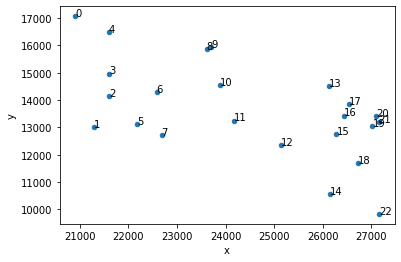

In [67]:
import pandas as pd

df = pd.DataFrame({"x": x, "y": y})
ax = df.plot.scatter("x", "y");

for i, txt in enumerate(range(n)):
    ax.annotate(i, (x[i], y[i]))

In [68]:
from itertools import combinations
from math import sqrt

costs = []
in_edges = []
out_edges = []

for i, j in combinations(range(n), 2):
    in_edges.append(i)
    out_edges.append(j)
    distance = sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)
    costs.append(distance)

df = pd.DataFrame({"source": in_edges, "target": out_edges, "cost": costs})
assert len(df) == n*(n-1)/2
distances = {(in_, out): cost for in_, out, cost in zip(in_edges, out_edges, costs)}
distances.update({(out, in_): cost for in_, out, cost in zip(in_edges, out_edges, costs)})
df.head()

,source,target,cost
0,0,1,4069.705149
1,0,2,2999.490730
2,0,3,2213.594362
3,0,4,900.617093
4,0,5,4137.397249


## Dynamic programming algorithm

In [69]:
%%time 

from itertools import chain, combinations
import numpy as np

def powerset(iterable):
    """
    powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)
    """
    xs = list(iterable)
    # note we return an iterator rather than a list
    return chain.from_iterable(combinations(xs,n) for n in range(len(xs)+1))


subsets = list(powerset(range(n)))[1:]
subsets_to_idx = {s: i for i, s in enumerate(subsets)}
n_subsets = len(subsets)

A = np.full([n_subsets, n], 1e6)
A[0, 0] = 0.

CPU times: user 8.82 s, sys: 955 ms, total: 9.78 s
Wall time: 9.78 s


In [70]:
import time

t0 = time.time()
for m in range(2, n+1):
    print(f"m={m} after {time.time()-t0:.1f}s")
    relevant_subsets = [(0,) + s for s in list(combinations(range(1, n), m-1))]
    relevant_subsets_indices = list(map(subsets_to_idx.__getitem__, relevant_subsets))
    for i in relevant_subsets_indices: 
        subset = subsets[i]
        for j in subset[1:]:
            subset_without_j = tuple(v for v in subset if v != j)
            subset_without_j_idx = subsets_to_idx[subset_without_j]
            
            values = []
            for k in subset_without_j:
                distance = distances[(j, k)]
                values.append(A[subset_without_j_idx, k] + distance)
            A[i, j] = min(values)
last_vertex = A[-1, :].argmin()
last_distances = (A[-1, i] + distances[(0, i)] for i in range(1, n))
total_cost = min(last_distances)

print(f"Finished after {time.time()-t0:.1f}s")

print(f"Total cost optimal tour (truncated graph): {int(total_cost)}")

m=2 after 0.0s
m=3 after 0.0s
m=4 after 0.0s
m=5 after 0.0s
m=6 after 1.4s
m=7 after 2.1s
m=8 after 5.1s
m=9 after 14.2s
m=10 after 35.6s
m=11 after 77.4s
m=12 after 142.4s
m=13 after 227.4s
m=14 after 315.2s
m=15 after 392.8s
m=16 after 450.2s
m=17 after 484.9s
m=18 after 501.9s
m=19 after 508.6s
m=20 after 510.8s
m=21 after 511.3s
m=22 after 511.4s
m=23 after 511.5s
Finished after 511.5s
Total cost optimal tour (truncated graph): 26263


In [71]:
print(f"Probable total cost with removed vertices: {total_cost+51.02+127.85}")

Probable total cost with removed vertices: 26442.729656309053
